In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [145]:
dataset = pd.read_csv('../data/Labelled_tweets_v1.csv')

In [146]:
dataset.head()

,Tweet,UserHandle,Party,Issue,Stance
0,a no of people approach me daily worried abt t...,ArvindKejriwal,AAP,GST,Disagreement
1,its now revealed that our fms silence on the p...,ArvindKejriwal,AAP,PNB Scam,Neutral
2,pnb scam started in is going on till today the...,ArvindKejriwal,AAP,PNB Scam,Neutral
3,would bjp confirm this if true what transpired...,ArvindKejriwal,AAP,PNB Scam,Neutral
4,bjp insiders telling that niravmodi been a reg...,ArvindKejriwal,AAP,PNB Scam,Neutral


In [147]:
issues_count = dataset.groupby('Issue')

In [148]:
issues = issues_count['Issue']
count = issues_count['Tweet']

In [149]:
count_ = issues_count['Tweet'].values.tolist()

AttributeError: Cannot access attribute 'values' of 'SeriesGroupBy' objects, try using the 'apply' method

In [150]:
issues = dataset['Issue'].unique()

In [151]:
issues.sort()
print(issues)

['Aadhar linking' 'Beef Ban' 'Cauvery SC Verdict' 'Demonetisation'
 'EVM tampering' 'FDIPolicy' 'Fodder scam' 'GDP growth' 'GST'
 'Inflation control' 'Jallikattu ban' 'PNB Scam'
 'Padmavati film screening' 'Ram Mandir' 'RightToPrivacy SC Verdict'
 'Rohingyas' 'Swacch Bharat' 'Triple Talaq SC verdict' 'TripleTalaqBill'
 'acchedin' 'hike in oil prices' 'lgp price hike' 'nsc and ppf rate cuts'
 'reservation']


In [152]:
issues_count

In [153]:
#grouped = pd.DataFrame(dataset.groupby(['Issue','Stance']).count())
#pd.melt(dataset, id_vars="Issue", value_name="Tweet",var_name="Stance")
#dataset.groupby(['Issue','Stance']).count().set_index(["Issue", "Stance"]).unstack(level=0)
stacked = dataset.groupby(['Issue', 'Stance']).count().unstack(level=1)

In [154]:
stacked.head()

Tweet                      UserHandle               \
Stance             Agreement Disagreement Neutral  Agreement Disagreement   
Issue                                                                       
Aadhar linking          55.0         63.0    23.0       55.0         63.0   
Beef Ban                24.0         85.0    19.0       24.0         85.0   
Cauvery SC Verdict     119.0          8.0    39.0      119.0          8.0   
Demonetisation         372.0        596.0   278.0      372.0        596.0   
EVM tampering          103.0         61.0    17.0      103.0         61.0   

                               Party                       
Stance             Neutral Agreement Disagreement Neutral  
Issue                                                      
Aadhar linking        23.0      55.0         63.0    23.0  
Beef Ban              19.0      24.0         85.0    19.0  
Cauvery SC Verdict    39.0     119.0          8.0    39.0  
Demonetisation       278.0     372.0        596.0   278.0  
EVM tampering         17.0     103.0         61.0    17.0

In [183]:
# stacked_tweet = stacked['Tweet']
# final_df = stacked_tweet#.drop('0')
# #final_df = final_df.drop('0',axis=1)
# final_df = final_df.fillna(0)
# final_df['Issues'] = final_df.index.values.tolist()
# final_df = final_df.reset_index(0)
# final_df
final_df['sum'] = final_df['Agreement'] + final_df['Disagreement'] + final_df['Neutral']
final_df_sorted = final_df.sort_values(by='sum', ascending=False)[['Issue','Agreement', 'Disagreement','Neutral']]
#final_df_sorted.head()
#final_df_sorted[0:7]
final_df_sorted = pd.concat([final_df_sorted[0:7],final_df_sorted[9:12]])

In [184]:
final_df_sorted

Stance,Issue,Agreement,Disagreement,Neutral
8,GST,1354.0,920.0,303.0
3,Demonetisation,372.0,596.0,278.0
20,hike in oil prices,84.0,226.0,58.0
7,GDP growth,168.0,140.0,46.0
11,PNB Scam,34.0,153.0,42.0
16,Swacch Bharat,185.0,30.0,8.0
13,Ram Mandir,150.0,0.0,73.0
18,TripleTalaqBill,149.0,20.0,20.0
4,EVM tampering,103.0,61.0,17.0
2,Cauvery SC Verdict,119.0,8.0,39.0


In [185]:
# print(issues)
# print(count_)
#stacked['Tweet']
final_df_sorted.rename(columns={'Issue':'Issues/Topics','Stance':'Stance','Values':'Number of tweets'},inplace=True)
# final_df_sorted
final_df_ = pd.melt(final_df_sorted, id_vars="Issues/Topics", var_name="Stance", value_name="Number of tweets")
#final_df.rename({'Issue':'Issues/Topics','Stance':'Stance','Values':'Number of tweets'},inplace=True)
final_df_

,Issues/Topics,Stance,Number of tweets
0,GST,Agreement,1354.0
1,Demonetisation,Agreement,372.0
2,hike in oil prices,Agreement,84.0
3,GDP growth,Agreement,168.0
4,PNB Scam,Agreement,34.0
5,Swacch Bharat,Agreement,185.0
6,Ram Mandir,Agreement,150.0
7,TripleTalaqBill,Agreement,149.0
8,EVM tampering,Agreement,103.0
9,Cauvery SC Verdict,Agreement,119.0


In [186]:
##### grouped
#sns.set_context("paper",font_scale=3)
#fig = sns.catplot( x='NTweets',y='Issue', orient="h",hue='Stance', data=final_df_,kind = 'bar',aspect=3.6,height = 15,)

In [187]:
fig.savefig('dataset_issue_barplot.eps')

In [188]:
# import seaborn as sns
# sns.set()
# final_df.set_index('App').T.plot(kind='bar', stacked=True)

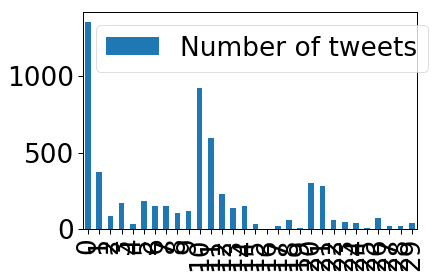

In [189]:
#ct = pd.crosstab(index = final_df_.Issue , columns = [final_df_.Stance])
final_df_.plot.bar(stacked=True)
#plt.legend(title='mark')

plt.show()

In [190]:
final_df_.rename(columns={'Issues/Topics':'Issue','stance':'stance','Number of tweets':'NTweets'},inplace = True)

In [191]:
final_df_.head()

,Issue,Stance,NTweets
0,GST,Agreement,1354.0
1,Demonetisation,Agreement,372.0
2,hike in oil prices,Agreement,84.0
3,GDP growth,Agreement,168.0
4,PNB Scam,Agreement,34.0


In [203]:
final_df_sorted

Stance,Issues/Topics,Agreement,Disagreement,Neutral
8,GST,1354.0,920.0,303.0
3,Demonetisation,372.0,596.0,278.0
20,hike in oil prices,84.0,226.0,58.0
7,GDP growth,168.0,140.0,46.0
11,PNB Scam,34.0,153.0,42.0
16,Swacch Bharat,185.0,30.0,8.0
13,Ram Mandir,150.0,0.0,73.0
18,TripleTalaqBill,149.0,20.0,20.0
4,EVM tampering,103.0,61.0,17.0
2,Cauvery SC Verdict,119.0,8.0,39.0


NameError: name 'df' is not defined

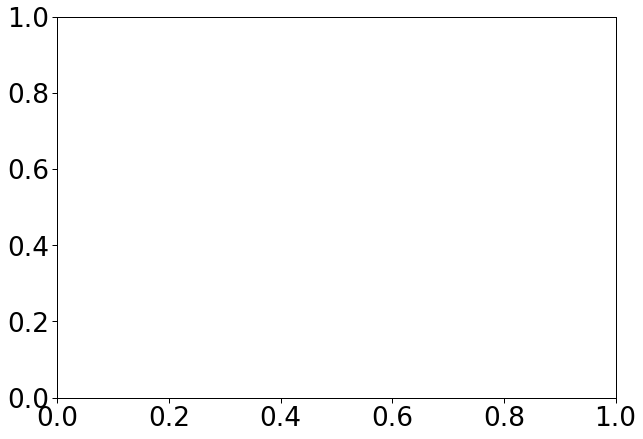

In [192]:
fig, ax = plt.subplots(figsize=(10,7))  

months = df['Month'].drop_duplicates()
margin_bottom = np.zeros(len(df['Year'].drop_duplicates()))
colors = ["#006D2C", "#31A354","#74C476"]

for num, month in enumerate(months):
    values = list(df[df['Month'] == month].loc[:, 'Value'])

    df[df['Month'] == month].plot.bar(x='Year',y='Value', ax=ax, stacked=True, 
                                    bottom = margin_bottom, color=colors[num], label=month)
    margin_bottom += values

plt.show()

In [209]:
#final_df_= final_df_.sort_values(by='NTweets',ascending=False)
#pivot_df = final_df_sorted.pivot(index='Issues/Topics', columns='Stance', values='Number of tweets')
#pivot_df = final_df_.pivot(index='Issue', columns='Stance', values='NTweets')
# pivot_df.sort_values(by=['Agreement','Disagreement','Neutral'],ascending=False,inplace =True)
final_df_sorted.set_index('Issues/Topics',inplace=True) 
final_df_sorted

Stance,Agreement,Disagreement,Neutral
Issues/Topics,,,
GST,1354.0,920.0,303.0
Demonetisation,372.0,596.0,278.0
hike in oil prices,84.0,226.0,58.0
GDP growth,168.0,140.0,46.0
PNB Scam,34.0,153.0,42.0
Swacch Bharat,185.0,30.0,8.0
Ram Mandir,150.0,0.0,73.0
TripleTalaqBill,149.0,20.0,20.0
EVM tampering,103.0,61.0,17.0


In [196]:
pivot_df

Stance,Agreement,Disagreement,Neutral
Issue,,,
Cauvery SC Verdict,119.0,8.0,39.0
Demonetisation,372.0,596.0,278.0
EVM tampering,103.0,61.0,17.0
GDP growth,168.0,140.0,46.0
GST,1354.0,920.0,303.0
PNB Scam,34.0,153.0,42.0
Ram Mandir,150.0,0.0,73.0
Swacch Bharat,185.0,30.0,8.0
TripleTalaqBill,149.0,20.0,20.0


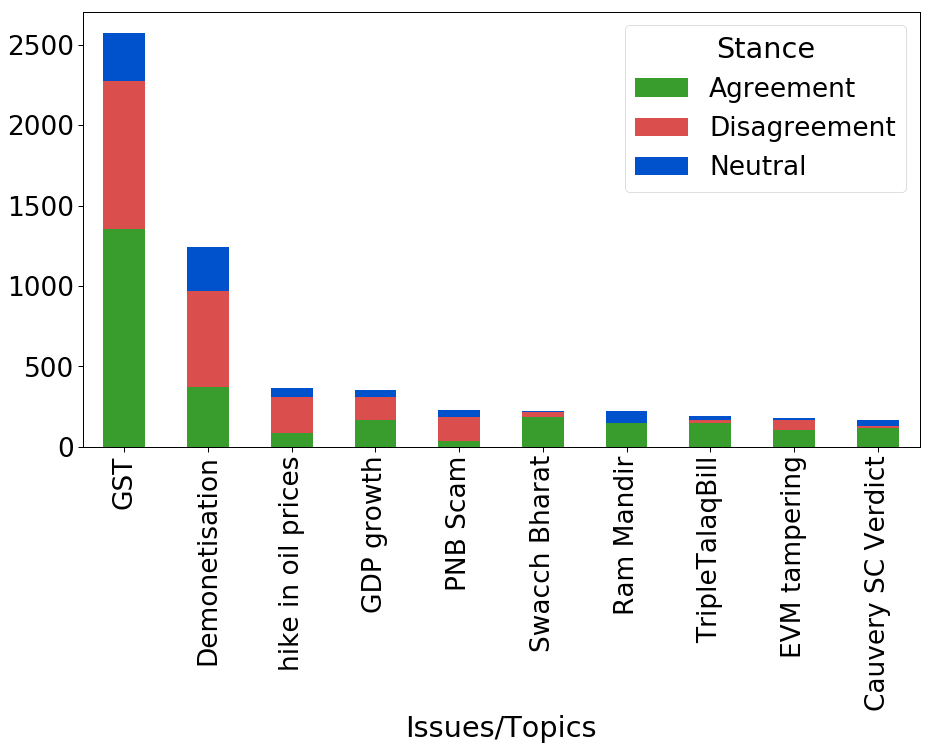

In [210]:
colors = ["#399D2D", "#DA4E4E","#0052cc"]
stacked = final_df_sorted.loc[:,['Agreement','Disagreement', 'Neutral']].plot.bar(stacked=True,color = colors, figsize=(15,8))
#stacked = pivot_df.loc[:,['Agreement','Disagreement', 'Neutral']].plot.bar(stacked=True,color = colors, figsize=(15,8))

In [211]:
fig = stacked.get_figure()

In [212]:
fig.savefig('stacked_bar.eps',fmt='eps',dpi=1000,bbox_inches='tight')

In [200]:
# final_df_